In [2]:
import pandas as pd
import dirty_data as d
import algorithms_class as a
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import imputation as i
import outlier_detection as od
from utils import encoding_categorical_variables as enc

In [3]:
df = pd.read_csv("../dataset/heart.csv")
name_class = 'disease'

selected_features = ['oldpeak','cp','thal', name_class]
selected_features_only = ['oldpeak','cp','thal']
df = df[selected_features]
quality = pd.DataFrame([50,60,70,80,90])
perc_quality = [50,60,70,80,90]

param = {
    'DecisionTree': 70,
    'LogisticRegression': 1,
    'KNN': 8,
    'RandomForest': 70,
    'AdaBoost': 90,
    'SVC': 1
}

In [4]:
### DECISION TREE

In [5]:
### 100% quality
median, clf_100 = a.classification(df[selected_features_only], df[name_class], 'DecisionTree', param['DecisionTree'], 4)

Training for DecisionTree...
0.7293556842001121


In [6]:
### 90% quality
df_dirt_90 = d.injection(df, name_class, 90/100, 10, 1)
median, clf_90 = a.classification(df_dirt_90[selected_features_only], df_dirt_90[name_class], 'DecisionTree', param['DecisionTree'], 4)

saved dirty dataset 90%
Training for DecisionTree...
0.7242920207482617


In [7]:
### 50% quality
df_dirt_50 = d.injection(df, name_class, 50/100, 10, 1)
median, clf_50 = a.classification(df_dirt_50[selected_features_only], df_dirt_50[name_class], 'DecisionTree', param['DecisionTree'], 4)


saved dirty dataset 50%
Training for DecisionTree...
0.6714122353214311


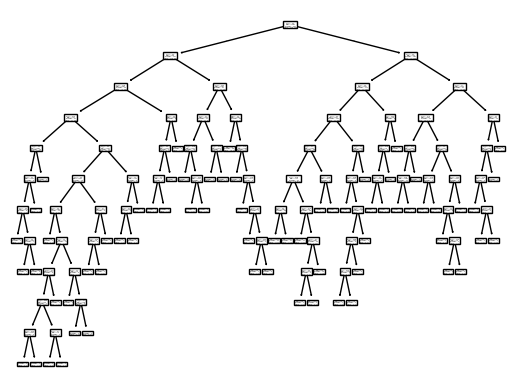

In [8]:
clf_100 = clf_100.fit(enc(df[selected_features_only]), df[name_class])
tree.plot_tree(clf_100)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT100' + ".pdf", bbox_inches='tight')
plt.show()

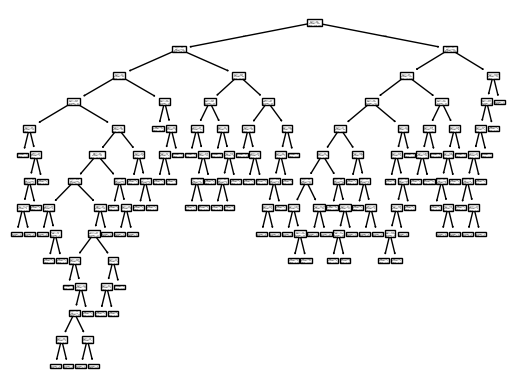

In [9]:
clf_90 = clf_90.fit(enc(df_dirt_90[selected_features_only]), df_dirt_90[name_class])
tree.plot_tree(clf_90)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT90' + ".pdf", bbox_inches='tight')
plt.show()

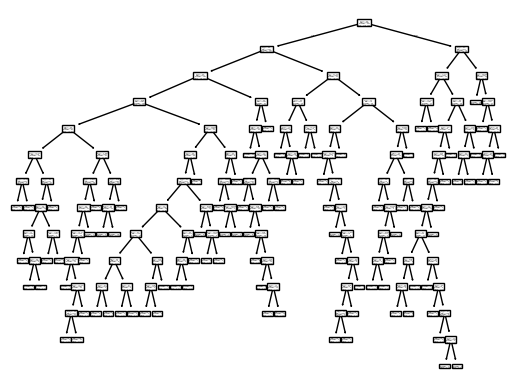

In [10]:
clf_50 = clf_50.fit(enc(df_dirt_50[selected_features_only]), df_dirt_50[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT50' + ".pdf", bbox_inches='tight')
plt.show()


In [11]:
def improve_completeness(df, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class):
    df_clean = df[selected_features_only].copy()

    df_clean = i.impute(df_clean, imp_1, imp_col_1)
    df_clean = i.impute(df_clean, imp_2, imp_col_2)
    df_clean = i.impute(df_clean, imp_3, imp_col_3)

    df_clean[name_class] = df[name_class]

    return df_clean

def improve_accuracy(df, od_1, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class):
    df_clean = df[selected_features_only].copy()

    indexes_1 = od.outliers(df_clean, od_1, selected_features[0])

    df_clean.loc[indexes_1,selected_features[0]] = np.nan

    df_clean[name_class] = df[name_class]

    df_clean = improve_completeness(df_clean, imp_1, imp_2, imp_3, imp_col_1, imp_col_2, imp_col_3, algorithm, name_class)

    return df_clean


In [12]:
### quality 50% step by step trees

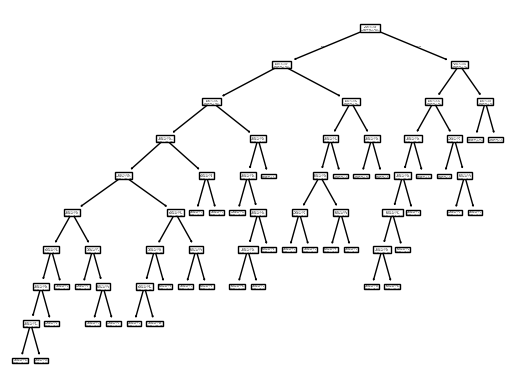

In [14]:
df_clean = improve_accuracy(df_dirt_50, 'KNN', 'impute_standard', 'impute_standard', 'impute_standard', 'oldpeak','cp','thal', 'DecisionTree', name_class)
clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT50_acc' + ".pdf", bbox_inches='tight')
plt.show()

In [15]:
### quality 90% step by step trees

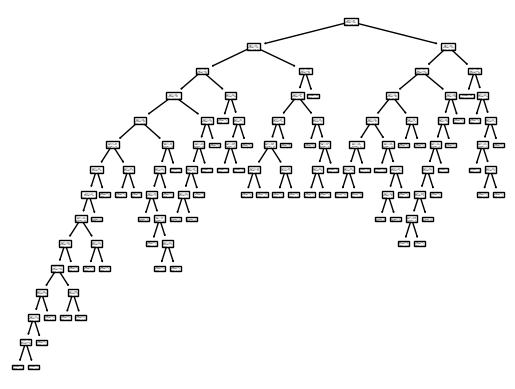

In [16]:
df_clean = improve_accuracy(df_dirt_90, 'KNN', 'impute_standard',
                                                                'impute_standard', 'impute_standard', 'oldpeak','cp','thal', 'DecisionTree',
                                                                name_class)
clf_50 = clf_50.fit(enc(df_clean[selected_features_only]), df_clean[name_class])
tree.plot_tree(clf_50)
plt.savefig("/Users/camillasancricca/Desktop/" + 'DT90_acc' + ".pdf", bbox_inches='tight')
plt.show()
